# Basic Nighttime Lights Raster Processing


You can get these data packages via the ['sez' tag at the SDRDL Data Repository](https://data.sandiegodata.org/?s=sez)

In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rowgenerators as rg
import fiona
import rasterio
import rasterio.mask
from IPython.display import display 
from rasterio.plot import reshape_as_raster, reshape_as_image, show

%matplotlib inline
sns.set_context('notebook')


In [2]:
# Load the administrative boundaries
pkg = mp.open_package('http://library.metatab.org/berkeley.edu-administrative_boundaries-1.1.1.csv')

# Create Dataframes

admin = {}
for r in pkg.resources():
    # Only load second level admin boundary files
    if r.name.endswith('admin2'):
        p = r.name.split('_')
        # Store in dict with country name as key
        admin[p[0]] =  pkg.resource(r.name).geoframe()
        
for k,v in admin.items():
    print(k, v.shape)

skorea (229, 16)
china (344, 16)
vietnam (678, 16)
turkey (928, 16)
philippines (1652, 16)
indonesia (444, 16)
colombia (1065, 16)


In [3]:
# US Counties, for an additional comparison
counties=rg.geoframe('censusgeo://2019/05/US/county')

In [4]:
# Load two years of rasters
# See the rasterio documentation for more examples: 
# https://rasterio.readthedocs.io/en/latest/topics/masking-by-shapefile.html
def load_ntl(pkg, year, shapes=None):
    
    ref = pkg.reference(f'ntl{year}').resolved_url.get_resource().get_target()
    
    with rasterio.open(str(ref.fspath)) as src:
        
        if shapes is not None:
            img, transform = rasterio.mask.mask(src, shapes, crop=True)
        else:
            img =  src.read()
            transform = None
            
        meta = src.meta
      
        
        return img, meta, transform

ntl = mp.open_package('http://library.metatab.org/figshare.com-harmonized_ntl-1.1.1.csv')
    
    
#ntl92, m92, t92 = load_ntl(ntl, 1992, tx.geometry)
#ntl18, m18, t18 = load_ntl(ntl, 2018, tx.geometry)
sk18, m18, t18 = load_ntl(ntl, 2018, admin['skorea'].geometry)

Text(0.5, 0.98, '2018 Nighttime Light Intensity\n100 Cities, Counties and District in South Korea')

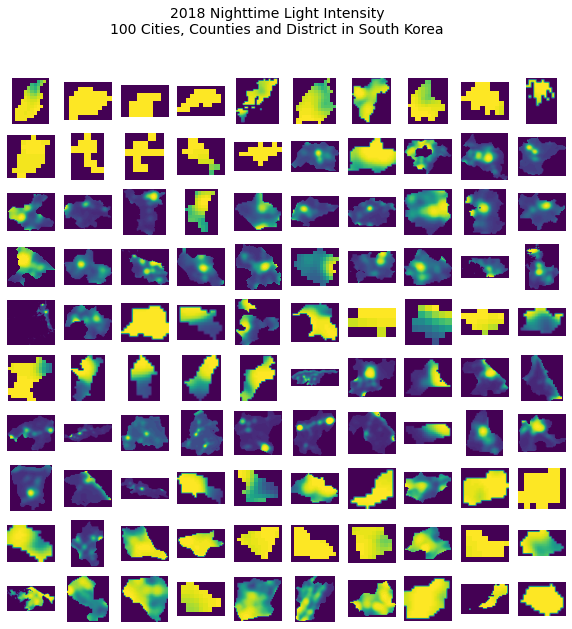

In [7]:
# Load a raster patch for each of the second-level administrative regions of
# South Korea and plot the first 100


# Just the rasters for South Korea
rasters = [ load_ntl(ntl, 2018, [r.geometry])[0] for idx,r in admin['skorea'].iterrows()] 
print(len(rasters))


fig, axes = plt.subplots(10,10, figsize=(10,10))
axes = np.ravel(axes)
for r, a in zip(rasters, axes):
    a.set_axis_off()
    show(r, ax=a)
    
fig.suptitle('2018 Nighttime Light Intensity\n100 Cities, Counties and District in South Korea', fontsize=14)

In [8]:
sk98, m98, t98 = load_ntl(ntl, 1998, admin['skorea'].geometry)
sk18, m18, t18 = load_ntl(ntl, 2018, admin['skorea'].geometry)

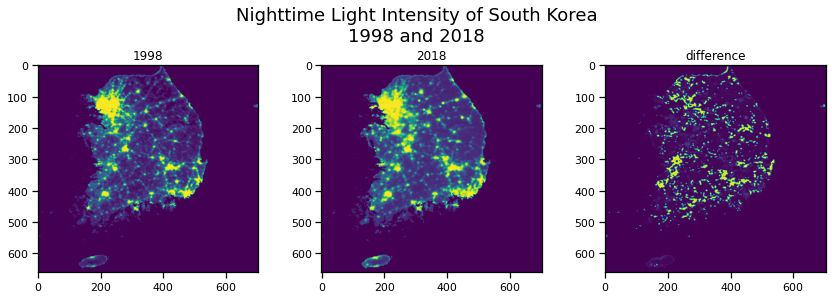

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

ax[0].imshow(reshape_as_image(sk98))
ax[0].set_title('1998')
ax[1].imshow(reshape_as_image(sk18))
ax[1].set_title('2018')
ax[2].imshow(reshape_as_image(sk18-sk98))
ax[2].set_title('difference')
fig.suptitle("Nighttime Light Intensity of South Korea\n1998 and 2018", fontsize=18);
plt.tight_layout()

In [19]:
sk = admin['skorea']
sk['name'] = sk['name_1']+'-'+sk['name_2']
sk.head()

,id,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry
0,0,213,KOR,South Korea,1,Busan,1,Buk,NaN,0,NaN,Gu,District,북구| 北區,NaN,"POLYGON ((128.99573 35.17683, 128.99829 35.192..."
1,1,213,KOR,South Korea,1,Busan,2,Busanjin,NaN,0,NaN,Gu,District,부산진구| 釜山鎭區,NaN,"POLYGON ((129.00488 35.12684, 129.01299 35.133..."
2,2,213,KOR,South Korea,1,Busan,3,Dong,NaN,0,NaN,Gu,District,동구| 東區,NaN,"POLYGON ((129.02118 35.10650, 129.02020 35.106..."
3,3,213,KOR,South Korea,1,Busan,4,Dongnae,NaN,0,NaN,Gu,District,동래구| 東萊區,NaN,"POLYGON ((129.07016 35.21380, 129.07967 35.218..."
4,4,213,KOR,South Korea,1,Busan,5,Gangseo,NaN,0,NaN,Gu,District,강서구| 江西區,NaN,"MULTIPOLYGON (((128.94847 35.11470, 128.93791 ..."


In [ ]:
from itertools import product


In [24]:
%%time 
for idx, r in sk.iterrows:
    for year in 
    sk98, m98, t98 = load_ntl(ntl, 1998, admin['skorea'].geometry)
    

In [25]:
sk.head()

,id,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,ccn_2,cca_2,type_2,engtype_2,nl_name_2,varname_2,geometry,name
0,0,213,KOR,South Korea,1,Busan,1,Buk,NaN,0,NaN,Gu,District,북구| 北區,NaN,"POLYGON ((128.99573 35.17683, 128.99829 35.192...",Busan-Buk
1,1,213,KOR,South Korea,1,Busan,2,Busanjin,NaN,0,NaN,Gu,District,부산진구| 釜山鎭區,NaN,"POLYGON ((129.00488 35.12684, 129.01299 35.133...",Busan-Busanjin
2,2,213,KOR,South Korea,1,Busan,3,Dong,NaN,0,NaN,Gu,District,동구| 東區,NaN,"POLYGON ((129.02118 35.10650, 129.02020 35.106...",Busan-Dong
3,3,213,KOR,South Korea,1,Busan,4,Dongnae,NaN,0,NaN,Gu,District,동래구| 東萊區,NaN,"POLYGON ((129.07016 35.21380, 129.07967 35.218...",Busan-Dongnae
4,4,213,KOR,South Korea,1,Busan,5,Gangseo,NaN,0,NaN,Gu,District,강서구| 江西區,NaN,"MULTIPOLYGON (((128.94847 35.11470, 128.93791 ...",Busan-Gangseo
